In [4]:
import math
import os
import jax
jax.config.update("jax_enable_x64", True)
import s2fft
import healpy as hp
import numpy as np
import s2wav
import matplotlib.pyplot as plt
import skyclean as sc

## 1. Visualise Components

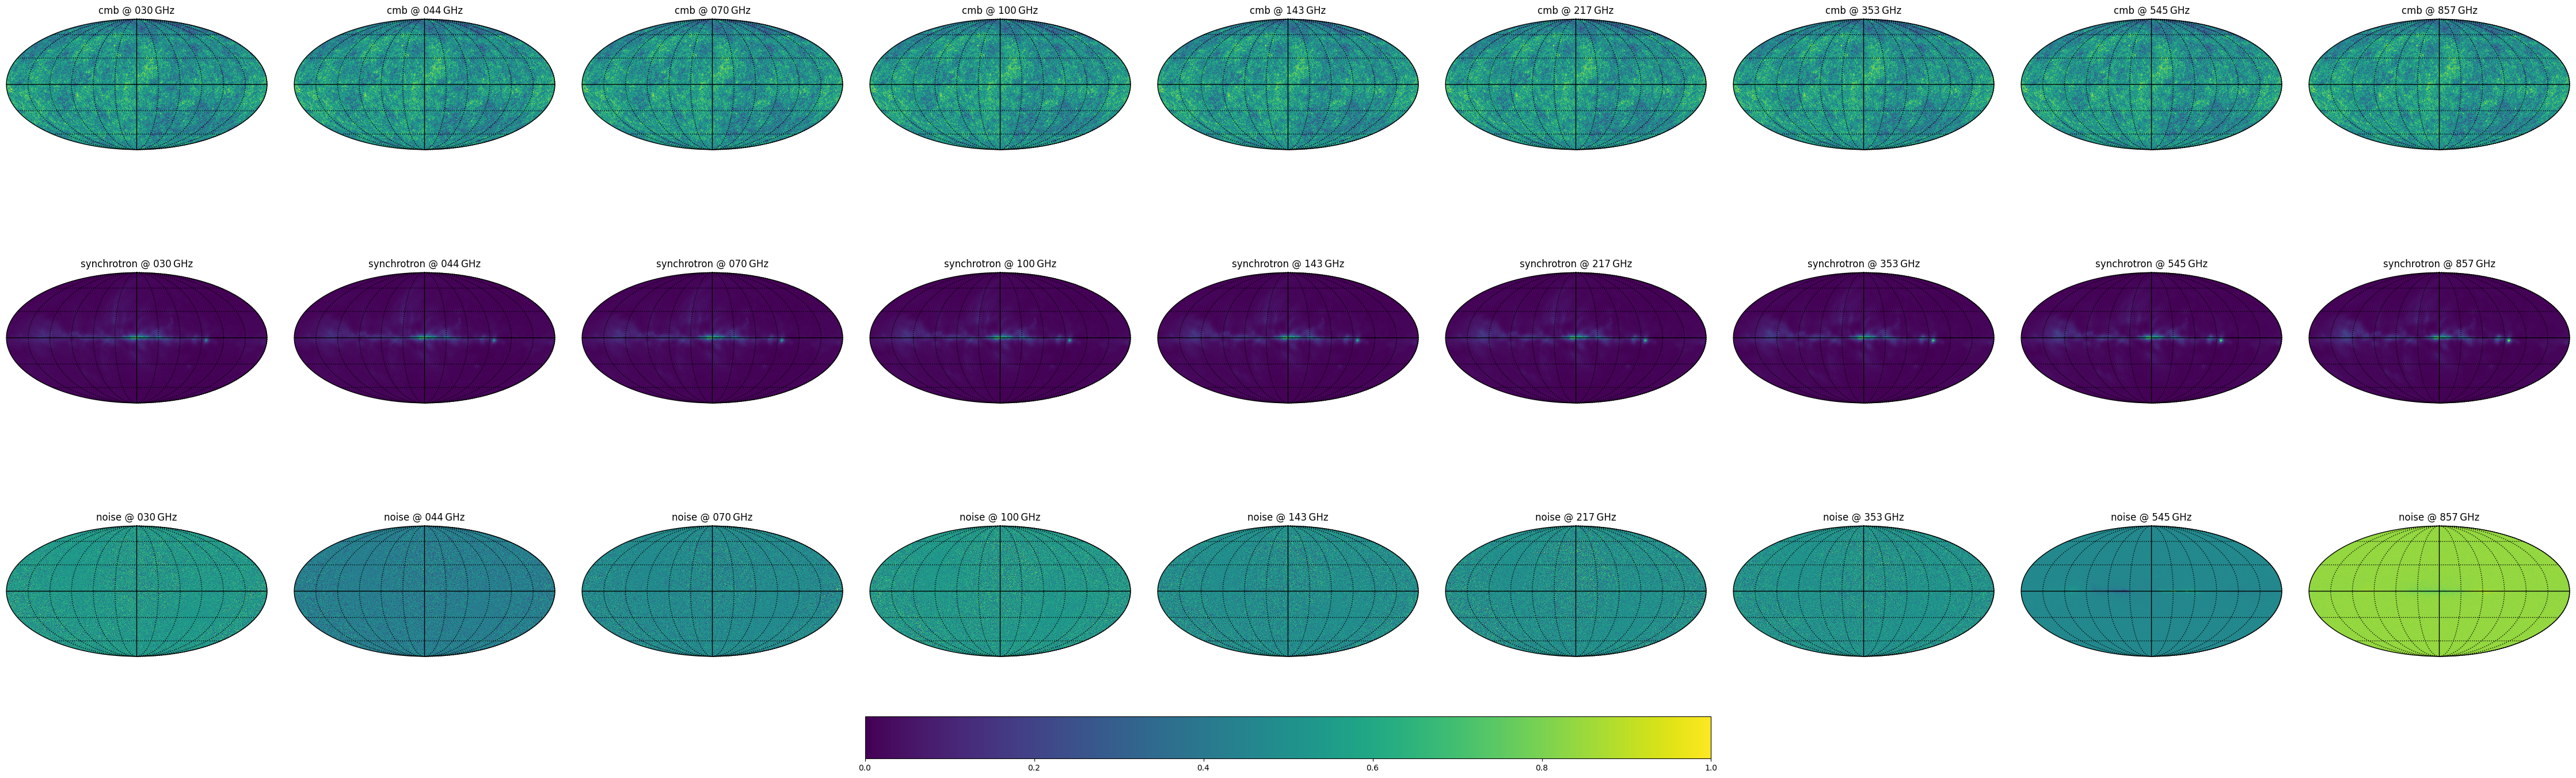

In [54]:
def visualize_all(components, frequencies,
                  realization, desired_lmax,
                  directory="CMB_realizations",
                  cmb_deconv=True):
    # setup figure
    nrows = len(components)
    ncols = len(frequencies)
    fig = plt.figure(figsize=(5*ncols, 5*nrows))

    for i, comp in enumerate(components):
        for j, freq in enumerate(frequencies):
            panel = i*ncols + j + 1
            if comp == 'cmb':
                fp = f"{directory}/febecop_ffp10_lensed_scl_cmb_{freq}_mc_{realization:04d}.fits"
            elif comp == 'synchrotron':
                fp = f"{directory}/COM_SimMap_synchrotron-ffp10-skyinbands-{freq}_2048_R3.00_full.fits"
            else:  # noise
                fp = f"{directory}/ffp10_noise_{freq}_full_map_mc_{realization:05d}.fits"

            _map, header = hp.read_map(fp, h=True)
            # Calibrate 545,857GHz
            if freq == "545":
                unit_conversion = 58.0356
                _map/= unit_conversion
            elif freq == "857":
                unit_conversion = 2.2681
                _map/= unit_conversion
            # Deconvolve if cmb
            if comp == "cmb" and cmb_deconv:
                HFI_beam_path = "HFI_beams/"+ f"Bl_T_R3.01_fullsky_{freq}x{freq}.fits"
                _map = sc.beam_deconvolution(_map, freq, desired_lmax, sc.arcmin_to_radians(5), HFI_beam_path)

            hp.mollview(
                _map,
                fig=fig.number,
                sub=(nrows, ncols, panel),
                title=f"{comp} @ {freq} GHz",
                unit="K",
                cbar=False        
            )
    cb = fig.colorbar(hp.graticule(), ax=fig.axes, orientation="horizontal", fraction=0.05, pad=0.07)
    plt.tight_layout()
    plt.savefig('components.pdf')
    plt.show()

components = ['cmb','synchrotron','noise']
frequencies = ["030", "044", "070", "100", "143", "217", "353", "545", "857"]
visualize_all(components, frequencies, realization=0, desired_lmax=256)


In [53]:
fp1 = f"CMB_realizations/febecop_ffp10_lensed_scl_cmb_030_mc_{0:04d}.fits"
fp2 = f"CMB_realizations/febecop_ffp10_lensed_scl_cmb_353_mc_{0:04d}.fits"
_map1, header = hp.read_map(fp1, h=True)
_map2, header = hp.read_map(fp2, h=True)
hp.mollview(_map2-_map1)

ValueError: operands could not be broadcast together with shapes (50331648,) (12582912,) 